In [1]:
!pip install tensorflow


Using tenserflow version 2.15.0 as it has keran installed in it

In [6]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [7]:
#import usefull liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset Churn Modeling

In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Problem statement:

- To predict weather the persion will exite the bank or not
- Exited - dependent feature

# 1. Divide dataset into independent and dependent features

- X = Independent features
- Y = Dependent feature


In [10]:
# RowNumber	CustomerId	Surname in data is not signoficant to me. (index location iloc)
X = dataset.iloc[:,3:13] # All rows excluding index 0-2

In [11]:
Y = dataset.iloc[:,13] # all rows (:) and only 13

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# 2. Feature engineering

- handelling categorical features
- drop categorical columns
- concate encoded columns

In [14]:
# one hot encoding
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

Dropping Geography and Gender categorical values columns

In [15]:
X = X.drop(['Geography','Gender'], axis =1) # axis = 1 is to deop column and not row

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


Concanating Encoded values

In [17]:
X = pd.concat([X,geography,gender],axis = 1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# 3. Train Test Split
- splitting dataset into train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size = 0.8 , random_state = 0)

In [21]:
len(X_test)

2000

# 4. Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [25]:
X_train.shape

(8000, 11)

In [26]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [27]:
X_test.shape

(2000, 11)

# 5. Create The ANN

- Tensorflow is a liberary used for DL , NLP etc.
- Keras is a wrapper for tenserflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [29]:
# Lets initialise the ANN
classifier = Sequential()

In [30]:
# Adding Input layer
classifier.add(Dense(units = 11,activation = 'relu',))

In [31]:
# Adding 1st Hidden Layer
classifier.add(Dense(units = 7,activation = 'relu'))


In [32]:
#Adding 2nd Hidden Layer
classifier.add(Dense(units = 6 , activation = 'relu'))

In [33]:
# Adding O/P layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

Compile Entire Neural Network

In [34]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

Early Stopping is used when the accuracy is not increasing , so it will stop it their.

In [35]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [36]:
model_history = classifier.fit(X_train , Y_train , validation_split=0.33 ,epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
168/168 [==============================] - 2s 4ms/step - loss: 0.5884 - accuracy: 0.7511 - val_loss: 0.4846 - val_accuracy: 0.7955
Epoch 2/1000
168/168 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7968 - val_loss: 0.4520 - val_accuracy: 0.7959
Epoch 3/1000
168/168 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7981 - val_loss: 0.4363 - val_accuracy: 0.7978
Epoch 4/1000
168/168 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8031 - val_loss: 0.4285 - val_accuracy: 0.8065
Epoch 5/1000
168/168 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8138 - val_loss: 0.4228 - val_accuracy: 0.8118
Epoch 6/1000
168/168 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 0.8205 - val_loss: 0.4181 - val_accuracy: 0.8183
Epoch 7/1000
168/168 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8261 - val_loss: 0.4166 - val_accuracy:

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Summarize history for accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

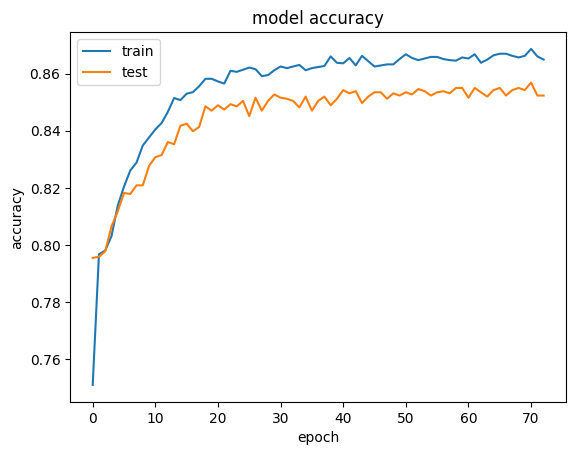

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train','test'],loc = 'upper left')
plt.show

loss summary

<function matplotlib.pyplot.show(close=None, block=None)>

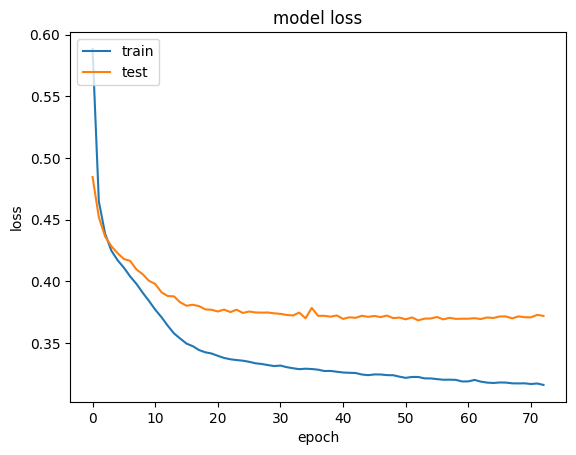

In [39]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train','test'],loc = 'upper left')
plt.show

## Making the prediction and evaluating the model

In [40]:
# predicting test set result
Y_pred  = classifier.predict(X_test)


63/63 [==============================] - 0s 1ms/step


In [41]:
Y_pred = (Y_pred >= 0.5 )

In [42]:
Y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [43]:
Y_train[:5]

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

Making confusing metrics

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(Y_test , Y_pred)
cm

array([[1517,   78],
       [ 215,  190]])

In [46]:
#calculate the accuracy

from sklearn.metrics import accuracy_score


In [47]:
score = accuracy_score(Y_test,Y_pred)

In [48]:
score

0.8535

Get the weughts

In [49]:
classifier.get_weights()

[array([[ 0.28874275, -0.14566036,  0.05401672, -0.08981584, -0.09530705,
         -0.52817464,  0.08726329,  0.35293403,  0.28799593, -0.12671041,
         -0.18758607],
        [-0.14352302,  0.04495167,  0.95866984, -0.74263644,  0.20557113,
         -0.12405368,  0.06123307, -0.3602731 , -0.75496525,  0.0663641 ,
          0.29327276],
        [ 0.25762728, -0.03951951,  0.20003392,  0.11215065,  0.10906245,
          0.57688034, -0.11932865,  0.13290885, -0.37616467,  0.19754274,
          0.12074159],
        [-0.5651151 ,  0.7101097 , -0.1935816 , -0.22902305, -0.2769477 ,
         -0.04326868, -0.39096817, -0.06444798, -0.16534935,  0.23328489,
          0.05183326],
        [-0.20313826, -0.1975719 ,  0.38953894,  0.00492024, -1.0041218 ,
          0.2592641 , -0.9602421 , -0.14047956,  0.09056142,  0.91622806,
         -0.5769014 ],
        [-0.08224304, -0.35757828, -0.10520027,  0.13366419,  0.05914014,
         -0.06322676,  0.06882134, -0.03686872,  0.01975525,  0.0611200

In [53]:
classifier.save('churn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
from tensorflow.keras.models import load_model
model = load_model('churn_model.h5')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
